In [51]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [52]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [53]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [54]:
# CNN

cnn1 = models.Sequential([
    # we only have to tell the size and the kernel size. Activation too ofc. Input shape is one image.
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    # then pooling
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn2 = models.Sequential([
    # we only have to tell the size and the kernel size. Activation too ofc. Input shape is one image.
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    # then pooling
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [55]:
# hyperparameters
batch_size = 64
epochs = 5
# legacy for m1 macs
optimizer_adam_lr1 = keras.optimizers.legacy.Adam(learning_rate=0.001)
optimizer_adam_lr2 = keras.optimizers.legacy.Adam(learning_rate=0.01)
optimizer_sgd_lr1 = keras.optimizers.legacy.SGD(learning_rate=0.001)
optimizer_sgd_lr2 = keras.optimizers.legacy.SGD(learning_rate=0.01) 

In [56]:
# training the model
def train_model(opt,epochs,architecture):
    #one layer cnn
    if architecture == "cnn1":
        cnn1.compile(optimizer=opt,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
        history = cnn1.fit(x_train, y_train, epochs=epochs , batch_size=batch_size, validation_data=(x_test, y_test))
        return history
    # three layer cnn
    elif architecture == "cnn2":
        cnn2.compile(optimizer=opt,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
        history = cnn2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
        return history
    else:
        print("Wrong architecture name. Choose either cnn1 or cnn2.")

In [57]:
# plotting the results
"""
Now it is time to learn about the influence hyperparameter and training choices
can make. Try out:
• Two different Learning Rates
• Two different Architectures (e.g. number and size of layers)
• Two different optimizers (Including Adam and one other)
In total this should create 8 respective settings, for each of which we ask you to
plot:
• Training Accuracy
• Training Loss
• Test Accuracy
• Test Loss
To be explicit: This should result in a total of 8 times four plots!
"""

# gather 4 different histories
reference_history = train_model(optimizer_adam_lr1,epochs,"cnn1")

# different learning rate
history_cnn1_adam_lr2 = train_model(optimizer_adam_lr2,epochs,"cnn1")

# different architecture
history_cnn2_adam_arch2 = train_model(optimizer_adam_lr1,epochs,"cnn2")

# different optimizer
history_cnn1_sgd = train_model(optimizer_sgd_lr1,epochs,"cnn1")


Epoch 1/5
782/782 [==============================] - 6s 8ms/step - loss: 1.5498 - accuracy: 0.4483 - val_loss: 1.3417 - val_accuracy: 0.5199
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 1.2559 - accuracy: 0.5603 - val_loss: 1.2346 - val_accuracy: 0.5621
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 1.1311 - accuracy: 0.6056 - val_loss: 1.1478 - val_accuracy: 0.5979
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 1.0509 - accuracy: 0.6360 - val_loss: 1.1540 - val_accuracy: 0.5938
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 0.9831 - accuracy: 0.6569 - val_loss: 1.1228 - val_accuracy: 0.6006
Epoch 1/5
782/782 [==============================] - 7s 8ms/step - loss: 1.3948 - accuracy: 0.5202 - val_loss: 1.2602 - val_accuracy: 0.5574
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 1.1981 - accuracy: 0.5775 - val_loss: 1.1854 - val_accuracy: 0.5849
Epoch 3/5
782

In [58]:
# plotting
def plot_history(history):

    # plot test and train accuracy
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc="upper left")
    plt.show()

    # plot test and train loss
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc="upper left")
    plt.show()



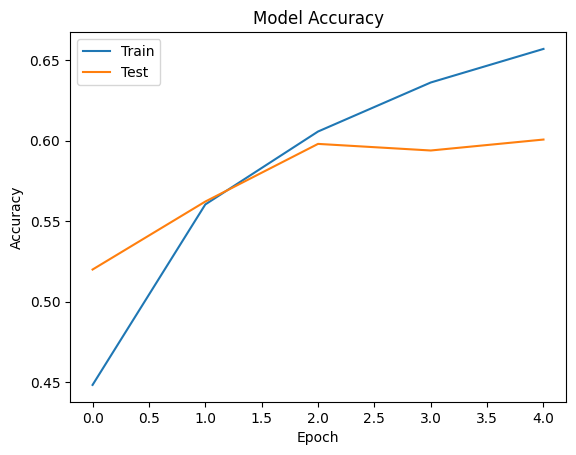

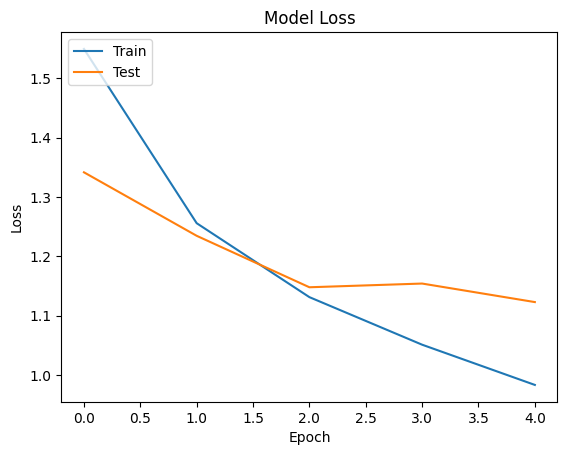

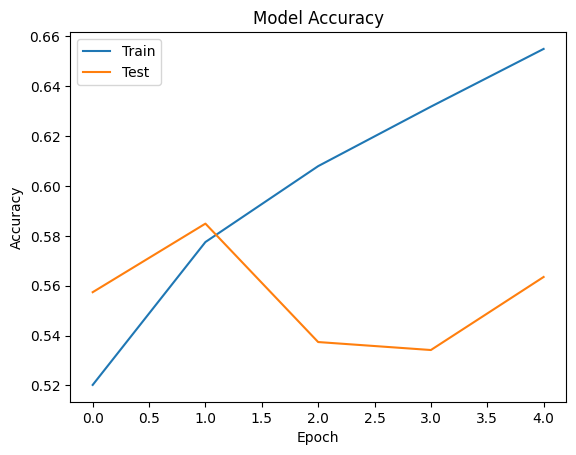

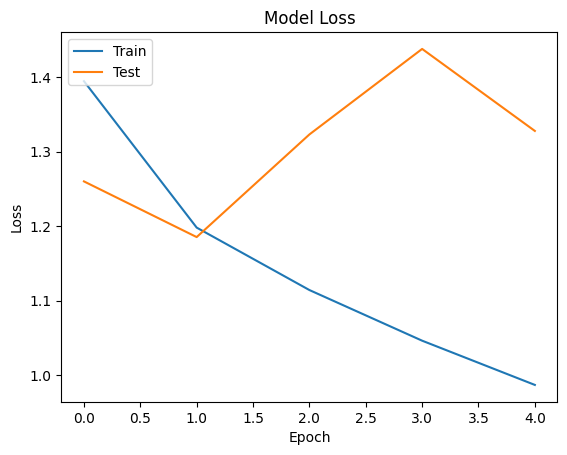

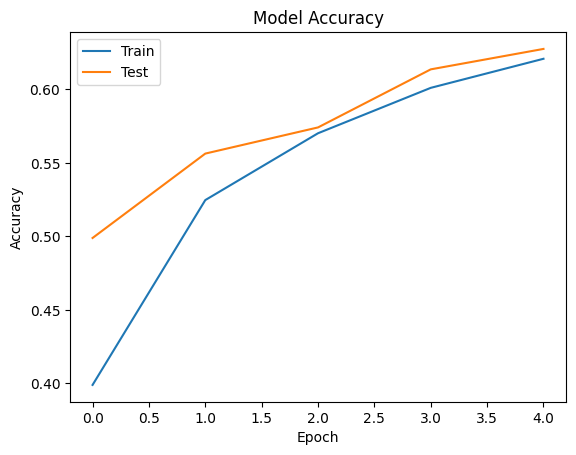

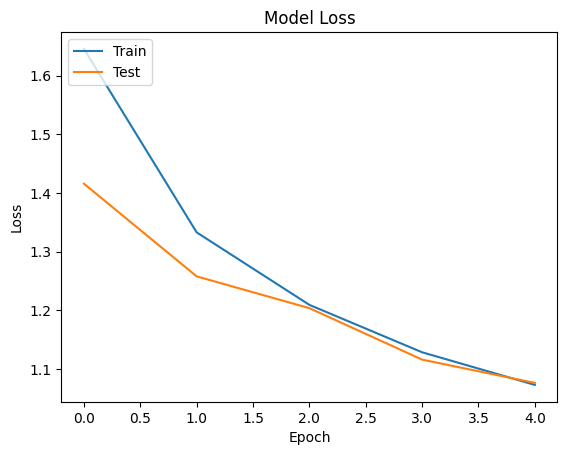

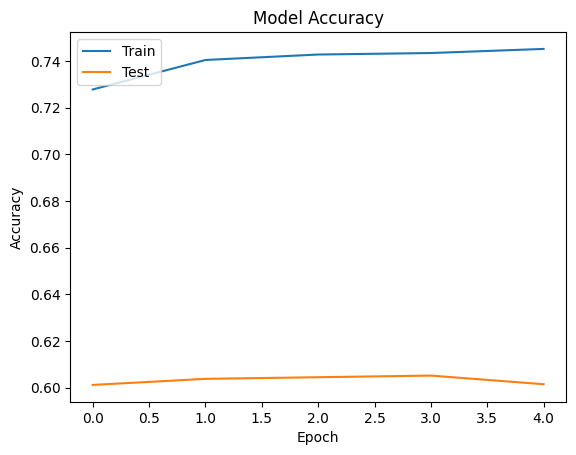

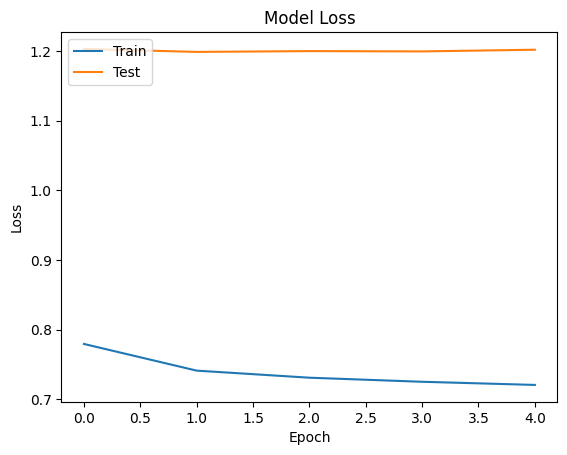

In [59]:
# plot the 4 histories
plot_history(reference_history)
plot_history(history_cnn1_adam_lr2)
plot_history(history_cnn2_adam_arch2)
plot_history(history_cnn1_sgd)